# Eigenvalue Problems

## Matrix Computing 

Physical systems are often modeled by systems of simultaneous equations written in matrix form.  Realistic models correspond to rather larger matrices, where it is important to use a good linear algebra library.  Computers are unusually good with matrix manipulations because those manipulations typically involve simple instructions that can be iterate many times and algorithms exist to do this quite efficiently.  Subroutines for matrix computing are found in well-established scientific libraries (e.g., `scipy` and `numpy`), where these subroutines are usually 

- ${\sim}10\times$ faster (or more) than the elementary methods found in linear algebra textbooks,
- designed to minimize the round-off error, and 
- have a high chance of success for a broad class of problems.

For these reasons, you *should not write your own matrix methods* (unless absolutely necessary), but instead get them from a library.


## Classes of Matrix Problems

There are some rules of mathematics that help you understand problems when solving equations.  For example, you should encounter problems if:

- you have more unknowns than equations, or
- if your equations are not linearly independent.

While you cannot obtain a unique solution when there are not enough equations, you may be able to *map out* a space of allowable solutions.  

If you have more equations than unknowns, then you have an *overdetermined* problem, which may not have a unique solution.  An overdetermined problem is sometimes treated using data fitting techniques in which a solution to a sufficient set of equations is found, tested on the unused equations, and then improved as necessary.   This technique is calle the *linear least squares method* because the method minimizes the disagreement with the equations.

The most basic matrix problem is a system of linear equations:

```{math}
:label: linear_eqn
\mathbf{A}\mathbf{x} = \mathbf{b},
```

which is defined by a known $N\times N$ matrix $\mathbf{A}$, an unknown vector $\mathbf{x}$ of length $N$, and a known vector $\mathbf{b}$ of length $N$.  The obvious way to solve this equation is to determine the inverse of $\mathbf{A}$ (i.e., $\mathbf{A}^{-1}$) and then multiply both sides to get:

\begin{align}
\mathbf{A}^{-1}\mathbf{A} &=  I_N,\qquad \text{(Identity property)}\\
\mathbf{A}^{-1}\mathbf{A}\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}, \\
\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}.
\end{align}

Both the direct solution of Eq. {eq}`linear_eqn` and the process of matrix inversion are standard in a matrix subroutine library.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/uQhTuRlWMxw"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

```{note}
A more efficient way to solve Eq. {eq}`linear_eqn` is by Gaussian elimination or [lower-upper (LU) decomposition](https://www.quantstart.com/articles/LU-Decomposition-in-Python-and-NumPy/) because it yields the vector $\mathbf{x}$ without explicitly calculating $\mathbf{A}^{-1}$.  Sometimes, you may want the inverse for other purposes, such that the method of multiplying by the inverse is preferred.
```
<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/ZDxONtacA_4"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>


Other matrix problems are of the following form:

```{math}
:label: eigenvalue_eqn
\mathbf{A}\mathbf{x} = \lambda \mathbf{x},
```

which is similar to Eq. {eq}`linear_eqn`, but with an unknown parameter $\lambda$.  This form is called the *eigenvalue* problem.  It is harder to solve because solutions exist for only certain (if any) values of $\lambda$.  To find a solution, we use the identity matrix to rewrite it as:

\begin{align}
\mathbf{A}x - \lambda\mathbf{x} = 0, \\
[\mathbf{A}-\lambda I_N ]\mathbf{x} = 0.
\end{align}

Multiplying by $[\mathbf{A}-\lambda I_N ]^{-1}$ yields the *trivial* solution $\mathbf{x} = 0$.  A more interesting solution implies the nonexistence of the inverse.  The inverse fails to exist when the determinant is zero, or

\begin{align}
\det{[\mathbf{A}-\lambda I_N]} = 0.
\end{align}

The values of $\lambda$ that satisfy this *secular* equation are the eigenvalues of Eq. {eq}`eigenvalue_eqn`.  To solve this equation, you need a subroutine to calculate the determinant of a matrix, and then a search routine to find the zero (root).

The traditional way to solve Eq. {eq}`eigenvalue_eqn` for both eigenvalues and eigenvectors is by *diagonalization*.  This is a process where a sequence of transformations (using a matrix $\mathbf{U}$) are continually operating on the original equation until one is found so that $\mathbf{U}\mathbf{A}\mathbf{U}^{-1} = \lambda I_N$.  Mathematically, this is:

\begin{align}
\mathbf{U}\mathbf{A}(\mathbf{U}^{-1}\mathbf{U})\mathbf{x} &= \lambda \mathbf{U}\mathbf{x},\\
(\mathbf{U}\mathbf{A}\mathbf{U}^{-1})(\mathbf{U}\mathbf{x}) &= \lambda \mathbf{U}\mathbf{x}, \\
\mathbf{U}\mathbf{A}\mathbf{U}^{-1} &= \begin{pmatrix}
\lambda_1^\prime & & \cdots & 0 \\
0 & \lambda_2^\prime & \cdots & 0 \\
0 & 0 & \lambda_3^\prime& \cdots \\
0 & \cdots & & \lambda_N^\prime 
\end{pmatrix}.
\end{align}

The diagonal values of $\mathbf{U}\mathbf{A}\mathbf{U}^{-1}$ are the eigenvalues with the eigenvectors

\begin{align}
\mathbf{x}_i = \mathbf{U}^{-1}\hat{e}_i.
\end{align}

The eigenvectors are just the columns of the matrix $\mathbf{U}^{-1}$, where there are a number of routines of this type found in subroutine libraries.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/PFDu9oVAE-g"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

## Practical Matrix Computing

Many scientific programming bugs arise from the improper use of arrays (e.g., `IndexError`).  Matrices are extensively used in scientific computing, where it can be difficult to keep track of maximum index or matrix dimensions.  Here are some things to consider:

- **Computers are finite**: Large matrices require more memory, which can slow down your computation significantly.  For example, a 4D array containing 100 elements in each dimension can have $(100)^4$ $64-\text{byte}$ words that occupy $\simeq 1\ {\rm GB}$ of memory.
- **Processing time**: Matrix operations (e.g., inversion) require ${\sim}N^3$ steps for a square matrix of dimension $N$.  Doubling the dimensions of a 2D square matrix leads to an *eightfold* increase in processing time.
- **Paging**: When a program runs out of RAM (i.e., fast memory), the operating system can use disk space instead and is called *paging*.  The process of writing to the disk is a slow process, which you want to avoid.  If your program is near the memory limit at which paging occurs, even a slight increase in a matrix's dimensions may lead to a *tenfold* increase in execution time.
- **Matrix storage**:  Matrices can be represented as a multidimensional block of stored numbers that appear in a linear order.  A $3\times 3$ matrix can be stored in

  - **row-major order**: $[a_{11},a_{12},a_{13},a_{21},a_{22},a_{23},a_{31},a_{32},a_{33}]$ (in Java or python), or
  - **column-major order**: $[a_{11},a_{21},a_{31},a_{12},a_{22},a_{32},a_{13},a_{23},a_{33}]$ (in Fortran).

    The element $a_{ij}$ is represented by the $i\text{th}$ row and $j\text{th}$ column.  The row-major order traverses *across each row* (i.e., increases the column index $j$) before advancing to the next row (i.e., increases the row index $i$).  The column-major order traverses *down each column* before advancing to the next column.
- **Subscript 0**: In python, C, and Java the indexing of arrays begin with the value 0.  Fortran has recently modified its standard to match these other languages, but older codes will have a standard to start the indices at 1.  
  
  Let `a = np.zeros((3,3))` represent a $3\times 3$ matrix (in python) initialized with $0$ for each element, where $a[0,0] = a_{11}$.  In Fortran, this element would be represented as $a(1,1) = a_{11}$.
- **Physical and logical dimensions**:  Some programming languages require you to issue commands (e.g., `double a[3][3]` or `zeros((3,3), Float))`) that tell the compiler how much memory it needs to set aside fo the array `a`.  This is called *physical memory*, where a matrix's *logical size* is the amount of memory that your actually use to store numbers.

  Modern programming languages permit *dynamic memory allocation*, where you may use variables as the dimension of your arrays and read in the values of the variables at run time (i.e., after the program is compiled).  As a result the matrices will have the same physical and logical sizes.

  However, `Fortran77` requires the dimensions to be specified at *compile time*, which can allow the physical and logical sizes to differ.  As a result, some subroutines from a library may need to know both the physical and logical sizes of your arrays.
- **Passing sizes to subprograms**: This is needed when the logical and physical dimensions of arrays differ.  When using external libraries, you must watch that the sizes of your matrices do not exceed the bound that have been declared in the subprograms.  This may occur *without* an error message and can give you the *wrong answers*.  If you are running a python program that calls a Fortran subroutine, you will need to pass *pointers* (i.e., addresses in memory) to variables and not the actual values of the variables.
- **Equivalence, pointers, references manipulations**: Computers used to have much more limited amounts of memory (see the [Apollo Guidance Computer](https://en.wikipedia.org/wiki/Apollo_Guidance_Computer)), which forced programmers to conserve memory by having different variables occupy the *same* memory location.  This is not a problem as long as these variables were not being used at the same time.  Fortran does this through the `Common` and `Equivalence` statements, where other languages can acheive this through manipulations of pointers and references. However, this is not a good practice as the complexity of the program grows significantly.  Do not use them unless it is a matter of "life or death"!
- **Say what's happening**: You decrease programming errors by using self-explanatory labels for your indices (subscripts), and comments (i.e., stating what your variables mean and describing your storage schemes).
- **Tests**: Always test a library routine on a small problem that your already known the answer to.  Then you'll know if you are supplying it with the right arguments and have all the links working. 

## Linear Algebra in `numpy`
Python does not create what we normally think of as abstract matrices when we use 2D arrays. Fortunately there is the `LinearAlgebra` package that treats 2D arrays (a 1D array of 1D arrays) as abstract matrices, and also provides a simple interface.

Consider the standard matrix equation (Eq. {eq}`linear_eqn`), where $\mathbf{A}$ is a $3\times 3$ matrix, $\mathbf{b}$ is a $3 \times 1$ vector, and the program will figure out the dimensions of vector $\mathbf{x}$.  In python, we start with the `import` packages and verify our input with some `print` statements.

In [13]:
import numpy as np 

A = np.array([[1,2,3],[22,32,42],[55,66,100]]) # Array of arrays
print("A = ", A)
b = np.array([1,2,3])
print("b = ", b)

A =  [[  1   2   3]
 [ 22  32  42]
 [ 55  66 100]]
b =  [1 2 3]


We now solve $\mathbf{A}\mathbf{x} = \mathbf{b}$ using `solve` from `numpy.linalg`, and test how close $\mathbf{A}\mathbf{x}-\mathbf{b}$ comes to a zero vector:

In [19]:
import numpy as np
from numpy.linalg import solve

x = np.linalg.solve(A,b) #Does solution
print("x = ", x)
print("Residual = ", np.dot(A,x)-b ) #LHS - RHS


x =  [-1.4057971  -0.1884058   0.92753623]
Residual =  [ 2.22044605e-16  2.66453526e-15 -1.77635684e-15]


We solved the entire set of linear equations (by elimination) with just the single command `solve`, performed a matrix multiplication (i.e., dot product) with `np.dot`, did a matrix subtraction, and obtained a solution close to machine precision.

A more direct way of solving Eq. {eq}`linear_eqn` is by calculating the inverse $\mathbf{A}^{-1}$, and then finding the dot product of the RHS with the inverse, $\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$:

In [20]:
import numpy as np 
from numpy.linalg import inv

A_inv = inv(A)
#test inverse through identity property
print("A^{-1}A = ", np.dot(A_inv,A))
#find solution using the inverse
print("x = ", np.dot(A_inv,b))

A^{-1}A =  [[ 1.00000000e+00 -4.30211422e-16 -1.08246745e-15]
 [-1.94289029e-16  1.00000000e+00 -9.99200722e-16]
 [ 9.71445147e-17  4.71844785e-16  1.00000000e+00]]
x =  [-1.4057971  -0.1884058   0.92753623]


We tested that `inv(A)` was true through the identity property, where $\mathbf{A}^{-1}\mathbf{A} = I_3$.  The result was accurate for the diagonal elements and near machine precision for the off-diagonal elements.  Then we used the inverse to solve the matrix equation directly, and found the same answer as before, within machine precision.

Now, consider solving the eigenvalue equation (Eq. {eq}`eigenvalue_eqn`) as the principal-axes system for a cube (i.e., rotational motion).  This requires us to determine a coordinate system in which the **inertia tensor** is diagonal, or

\begin{align}
\mathbf{I}\omega = \lambda \omega,
\end{align}

where $\mathbf{I}$ represents the inertia matrix, $\omega$ is an eigenvector, and $\lambda$ is an eigenvalue.  This can be solved using the `eig` function from `numpy.linalg` given the inertia matrix as

\begin{align}
\mathbf{I} = \begin{pmatrix}
\frac{2}{3} & -\frac{1}{4} & -\frac{1}{4} \\
-\frac{1}{4} & \frac{2}{3} & -\frac{1}{4} \\
-\frac{1}{4} & -\frac{1}{4} & \frac{2}{3}
\end{pmatrix}.
\end{align}

In [25]:
import numpy as np
from numpy.linalg import eig 

I = np.array([[2./3.,-0.25,-0.25],[-0.25,2./3.,-0.25],[-0.25,-0.25,2./3.]])
print("I = ", I) #checking that I was input correctly

Es, evectors = eig(I)
print("Eigenvalues = ", Es)
print("Matrix of Eigenvectors = ", evectors) #Transpose is incorrectly printed in the textbook

print("--------------------")
Vec = evectors[:,0] # a single eigenvector to test RHS = LHS
LHS = np.dot(I,Vec)
RHS = np.dot(Vec,Es[0])

print("LHS - RHS = ", LHS-RHS)
print("LHS = ", LHS)
print("RHS = ", RHS)

I =  [[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [-0.25       -0.25        0.66666667]]
Eigenvalues =  [0.91666667 0.16666667 0.91666667]
Matrix of Eigenvectors =  [[ 0.81649658 -0.57735027  0.43514263]
 [-0.40824829 -0.57735027 -0.81589244]
 [-0.40824829 -0.57735027  0.38074981]]
--------------------
LHS - RHS =  [ 1.11022302e-16 -5.55111512e-17 -1.11022302e-16]
LHS =  [ 0.7484552 -0.3742276 -0.3742276]
RHS =  [ 0.7484552 -0.3742276 -0.3742276]


## Testing Matrix Programs
Here are some exercises to see how to solve matrix problems in general.

1. Find the numerical inverse of $\mathbf{A} = \begin{pmatrix} 4 & -2 & 1 \\ 3 & 6 & -4 \\ 2 & 1 & 8 \end{pmatrix}$.

Note that the analytical solution can be determined using the `sympy` module, which is shown below.

'A^{-1} = '

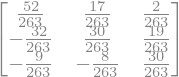

In [14]:
import sympy as sym
from IPython.display import display
sym.init_printing()

A = sym.Matrix([[4, -2, 1], [3, 6, -4],[2, 1, 8]])
display("A^{-1} = ",A.inv())

In [16]:
import numpy as np 
from numpy.linalg import inv 

A = np.array([[4, -2, 1], [3, 6, -4],[2, 1, 8]])
inv_A = inv(A)
print("A = ", A)
print("-------")
print("A^{-1} = ", inv_A)
print("-------")
print("A^{-1}A = ", np.dot(inv_A,A))
print("-------")
analytical_inv_A = (1./263.)*np.array([[52, 17, 2],[-32, 30, 19], [-9,-8, 30]])
error = analytical_inv_A - inv_A
print("error in A^{-1} using analytical result = ", error)

A =  [[ 4 -2  1]
 [ 3  6 -4]
 [ 2  1  8]]
-------
A^{-1} =  [[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]
-------
A^{-1}A =  [[ 1.00000000e+00 -3.46944695e-18  5.55111512e-17]
 [ 2.77555756e-17  1.00000000e+00  2.22044605e-16]
 [ 2.77555756e-17  0.00000000e+00  1.00000000e+00]]
-------
error in A^{-1} using analytical result =  [[ 0.00000000e+00  0.00000000e+00 -6.07153217e-18]
 [ 0.00000000e+00  1.38777878e-17 -2.77555756e-17]
 [ 0.00000000e+00  3.46944695e-18 -1.38777878e-17]]


2. Consider the same matrix $\mathbf{A}$ as before, but now used to describe three simultaneous linear equations, $\mathbf{A}\mathbf{x} = \mathbf{b}$.  Here, $\mathbf{b}$ is known and has three component vectors:
   \begin{align}
   b_1 = \begin{pmatrix} 12 \\ 4 \\ 20 \end{pmatrix} &\quad b_2 = \begin{pmatrix} -25 \\ -10 \\ -30 \end{pmatrix} & b_3 = \begin{pmatrix} 32 \\ 22 \\ 40 \end{pmatrix}.
   \end{align}

   Determine the three different $\mathbf{x}$ vectors for each component vector in $\mathbf{b}$.

In [22]:
import numpy as np 
from numpy.linalg import solve 

A = np.array([[4, -2, 1], [3, 6, -4],[2, 1, 8]])
b = np.array([[12, 4, 20], [-25, -10, -30], [32, 22, 40]])
x = solve(A,b)

for i in range(0,3):
    if i ==0:
        print("x_%i = " % (i+1), "[%i, %i, %i]" % (x[0,i],x[1,i],x[2,i]))
    else:
        print("x_%i = " % (i+1), "[%1.3f, %1.3f, %1.3f]" % (x[0,i],x[1,i],x[2,i]))

x_1 =  [1, -2, 4]
x_2 =  [0.312, -0.038, 2.677]
x_3 =  [2.319, -2.966, 4.791]


3. Consider the matrix $\mathbf{A} = \begin{pmatrix} \alpha & \beta \\ -\beta & \alpha \end{pmatrix}$, where you are free to use any values you want for $\alpha$ and $\beta$.  Show that the eigenvalues and eigenvectors are the complex conjugates $x_{1,2}$ and $\lambda_{1,2}$, respectively. Note that python uses $j$ to denote a complex number instead of $i$.
   
\begin{align} 
x_{1,2} = \frac{1}{\sqrt{2}} \begin{pmatrix} +1 \\ \pm i \end{pmatrix}, &\quad \lambda_{1,2} = \alpha \mp i\beta.
\end{align}

In [41]:
import numpy as np 
from numpy.linalg import eig 

alpha = np.around(np.random.rand(),4)
beta = 10*np.around(np.random.rand(),4)
A = np.array([[alpha, beta], [-beta, alpha]])
Es, evectors = eig(A)

print("alpha = ",alpha, " beta = ", beta)
for i in range(0,2):
    print("sqrt(2)*x_%i = " % (i+1), np.sqrt(2)*evectors[:,i])
    print("lambda_%i = " % (i+1), np.around(Es[i],4))

alpha =  0.587  beta =  1.321
sqrt(2)*x_1 =  [1.+0.j 0.+1.j]
lambda_1 =  (0.587+1.321j)
sqrt(2)*x_2 =  [1.+0.j 0.-1.j]
lambda_2 =  (0.587-1.321j)


## Quantum Eigenvalues in Arbitrary Potential

## Nucleon in a box

## Eigenvalues via ODE Sovler + Search

## Numerov Algorithm for Sch&ouml;dinger ODE